## A Two-sample t-test to find differentially expressed miRNA's between normal and tumor tissues in Lung Adenocarcinoma

In [77]:
import os
import pandas

mirna_src_dir = os.getcwd() + "/assn-mirna-luad/data/processed/miRNA/"
clinical_src_dir = os.getcwd() + "/assn-mirna-luad/data/processed/clinical/"

mirna_tumor_df = pandas.read_csv(mirna_src_dir+'tumor_miRNA.csv')
mirna_normal_df = pandas.read_csv(mirna_src_dir+'normal_miRNA.csv')
clinical_df = pandas.read_csv(clinical_src_dir+'clinical.csv')

print "mirna_tumor_df.shape", mirna_tumor_df.shape
print "mirna_normal_df.shape", mirna_normal_df.shape

"""
Here we select samples to use for our regression analysis
"""
matched_samples = pandas.merge(clinical_df, mirna_normal_df, on='patient_barcode')['patient_barcode']
# print "matched_samples", matched_samples.shape
# merged = pandas.merge(clinical_df, mirna_tumor_df, on='patient_barcode')
# print merged.shape
# print
# print merged['histological_type'].value_counts().sort_index(axis=0)
# print
# print merged['pathologic_stage'].value_counts().sort_index(axis=0)
# print
# print merged['pathologic_T'].value_counts().sort_index(axis=0)
# print
# print merged['pathologic_N'].value_counts().sort_index(axis=0)
# print
# print merged['pathologic_M'].value_counts().sort_index(axis=0)
# print

mirna_tumor_df.shape (513, 1882)
mirna_normal_df.shape (46, 1882)


In [78]:
from sklearn import preprocessing
import numpy as np
X_normal = mirna_normal_df[mirna_normal_df['patient_barcode'].isin(matched_samples)].sort_values(by=['patient_barcode']).copy()
X_tumor = mirna_tumor_df.copy()
X_tumor_matched = mirna_tumor_df[mirna_tumor_df['patient_barcode'].isin(matched_samples)].sort_values(by=['patient_barcode']).copy()

X_normal.__delitem__('patient_barcode')
X_tumor_matched.__delitem__('patient_barcode')
X_tumor.__delitem__('patient_barcode')

print "X_normal.shape", X_normal.shape
print "X_tumor.shape", X_tumor.shape
print "X_tumor_matched.shape", X_tumor_matched.shape

mirna_list = X.columns.values

# X_scaler = preprocessing.StandardScaler(with_mean=False).fit(X)
# X = X_scaler.transform(X)

X_normal.shape (46, 1881)
X_tumor.shape (513, 1881)
X_tumor_matched.shape (46, 1881)


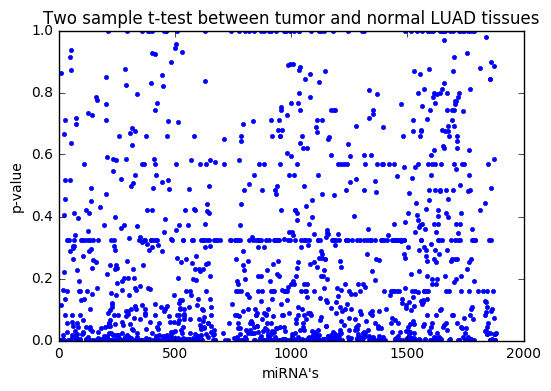

In [79]:
from scipy.stats import ttest_rel, ttest_ind
import matplotlib.pyplot as plt

ttest = ttest_rel(X_tumor_matched, X_normal)

plt.plot(ttest[1], ls='', marker='.')
plt.title('Two sample t-test between tumor and normal LUAD tissues')
plt.ylabel('p-value')
plt.xlabel('miRNA\'s')
plt.show()

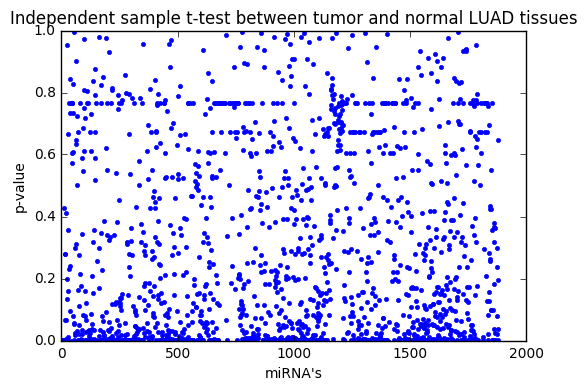

In [80]:
ttest = ttest_ind(X_tumor, X_normal)

plt.plot(ttest[1], ls='', marker='.')
plt.title('Independent sample t-test between tumor and normal LUAD tissues')
plt.ylabel('p-value')
plt.xlabel('miRNA\'s')
plt.show()